<a target="_blank" href="https://colab.research.google.com/github/victorlymarev/pandas/blob/main/notebooks/22-categoorical.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import os

In [2]:
path_empl = '../tables/employees.parquet' if os.path.exists('../tables/employees.parquet') else 'https://drive.google.com/uc?id=1AARD5-eVlCxoApt5CYZebrC3Cqw42lvj'

empl = pd.read_parquet(path_empl)
empl.head()

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary
0,2015-01-31,100000,Кожевников Андрей Максимович,мужской,1,Директор магазина,11,<NA>,1,0,1987-03-11,высшее,5,45700.0
1,2015-01-31,0,Дубинина Надежда Николаевна,женский,1,Старший кассир,12,11,0,0,1971-07-07,среднее профессиональное,5,20000.0
2,2015-01-31,1,Вишневскиая Валентина Константиновна,женский,1,Кассир,13,12,0,0,1974-11-29,среднее общее,5,12600.0
3,2015-01-31,2,Литвинов Александр Максимович,мужской,1,Кассир,14,12,0,0,1969-11-01,среднее общее,3,12600.0
4,2015-01-31,3,Черняева Валерия Глебовна,женский,1,Продавец-консультант,17,11,0,0,1988-07-17,среднее общее,<NA>,15400.0


#### Категориальный тип позволяет экономить память

In [3]:
empl['pos_name'].memory_usage()

469952

In [4]:
# приводим обычную колонку к категориальному типу
empl['pos_name'] = pd.Categorical(empl['pos_name'])

empl['pos_name'].memory_usage()

264720

In [5]:
469952 / 264720

1.775279540646721

Экономия достигается за счет того, что в каждой ячейке хранится не строка а число

In [6]:
empl['pos_name'].cat.categories

Index(['Бухгалтер', 'Директор магазина', 'Заместитель директора магазина',
       'Кассир', 'Мастер по ремонту одежды', 'Продавец-консультант',
       'Старший кассир', 'Товаровед', 'Уборщик'],
      dtype='string')

In [7]:
empl['pos_name'].cat.codes

0        1
1        6
2        3
3        3
4        5
        ..
29367    5
29368    7
29369    7
29370    4
29371    8
Length: 29372, dtype: int8

#### Категории можно сортировать

In [8]:
# Всписке категорий указываем значения в порядке возрастания
cats = ['Уборщик',
    'Кассир',
    'Продавец-консультант',
    'Старший кассир',
    'Мастер по ремонту одежды',
    'Товаровед',
    'Бухгалтер',
    'Заместитель директора магазина',
    'Директор магазина'
]

In [9]:
empl['pos_name'] = empl['pos_name'].cat.reorder_categories(cats, ordered=True)

In [ ]:
# empl['pos_name'] = pd.Categorical(empl['pos_name'], categories=cats, ordered=True)

In [10]:
empl['pos_name'].head()

0       Директор магазина
1          Старший кассир
2                  Кассир
3                  Кассир
4    Продавец-консультант
Name: pos_name, dtype: category
Categories (9, object): ['Уборщик' < 'Кассир' < 'Продавец-консультант' < 'Старший кассир' ... 'Товаровед' < 'Бухгалтер' < 'Заместитель директора магазина' < 'Директор магазина']

#### Теперь мы можем сравнивать категории

In [11]:
empl['pos_name'] > 'Товаровед'

0         True
1        False
2        False
3        False
4        False
         ...  
29367    False
29368    False
29369    False
29370    False
29371    False
Name: pos_name, Length: 29372, dtype: bool

In [12]:
empl['pos_name'].max()

'Директор магазина'

#### Удаление порядка из категорий

In [13]:
empl['pos_name'].cat.as_unordered()

0               Директор магазина
1                  Старший кассир
2                          Кассир
3                          Кассир
4            Продавец-консультант
                   ...           
29367        Продавец-консультант
29368                   Товаровед
29369                   Товаровед
29370    Мастер по ремонту одежды
29371                     Уборщик
Name: pos_name, Length: 29372, dtype: category
Categories (9, object): ['Уборщик', 'Кассир', 'Продавец-консультант', 'Старший кассир', ..., 'Товаровед', 'Бухгалтер', 'Заместитель директора магазина', 'Директор магазина']

#### Добавление новой категории

В категориальный тип нельзя добавлять новые значения, которые не находятся в списке категорий

In [14]:
empl['pos_name'].iloc[3] = 'Мерчендайзер'

TypeError: Cannot setitem on a Categorical with a new category (Мерчендайзер), set the categories first

In [15]:
empl['pos_name'] = empl['pos_name'].cat.add_categories('Мерчендайзер')
empl['pos_name'].head()

0       Директор магазина
1          Старший кассир
2                  Кассир
3                  Кассир
4    Продавец-консультант
Name: pos_name, dtype: category
Categories (10, object): ['Уборщик' < 'Кассир' < 'Продавец-консультант' < 'Старший кассир' ... 'Бухгалтер' < 'Заместитель директора магазина' < 'Директор магазина' < 'Мерчендайзер']

In [16]:
empl['pos_name'].iloc[3] = 'Мерчендайзер'
empl['pos_name'].head()

0       Директор магазина
1          Старший кассир
2                  Кассир
3            Мерчендайзер
4    Продавец-консультант
Name: pos_name, dtype: category
Categories (10, object): ['Уборщик' < 'Кассир' < 'Продавец-консультант' < 'Старший кассир' ... 'Бухгалтер' < 'Заместитель директора магазина' < 'Директор магазина' < 'Мерчендайзер']

Можно автоматически удалять ненужные категории

In [17]:
(empl['pos_name']
    .cat.add_categories('Грузчик') # добавляем категорию
    .cat.remove_unused_categories() # удаляем категрию
    .head()
)

0       Директор магазина
1          Старший кассир
2                  Кассир
3            Мерчендайзер
4    Продавец-консультант
Name: pos_name, dtype: category
Categories (10, object): ['Уборщик' < 'Кассир' < 'Продавец-консультант' < 'Старший кассир' ... 'Бухгалтер' < 'Заместитель директора магазина' < 'Директор магазина' < 'Мерчендайзер']

## сut

#### Функция делит непрерывную величину на интервалы

Можно указать количество равных по длинне интервалов, на которое поделится величина

In [18]:
pd.cut(empl['salary'], bins=10)

0        (41020.0, 55230.0]
1        (12457.9, 26810.0]
2        (12457.9, 26810.0]
3        (12457.9, 26810.0]
4        (12457.9, 26810.0]
                ...        
29367    (26810.0, 41020.0]
29368    (26810.0, 41020.0]
29369    (26810.0, 41020.0]
29370    (26810.0, 41020.0]
29371    (12457.9, 26810.0]
Name: salary, Length: 29372, dtype: category
Categories (10, interval[float64, right]): [(12457.9, 26810.0] < (26810.0, 41020.0] < (41020.0, 55230.0] < (55230.0, 69440.0] ... (97860.0, 112070.0] < (112070.0, 126280.0] < (126280.0, 140490.0] < (140490.0, 154700.0]]

Можно передать эти интервалы

In [19]:
pd.cut(empl['salary'], bins=[0, 20000, 50000, 100000, 1000000])

0        (20000, 50000]
1            (0, 20000]
2            (0, 20000]
3            (0, 20000]
4            (0, 20000]
              ...      
29367    (20000, 50000]
29368    (20000, 50000]
29369    (20000, 50000]
29370    (20000, 50000]
29371    (20000, 50000]
Name: salary, Length: 29372, dtype: category
Categories (4, interval[int64, right]): [(0, 20000] < (20000, 50000] < (50000, 100000] < (100000, 1000000]]

Можно указать названия интервалов

In [20]:
pd.cut(empl['salary'],
       bins=[0, 20000, 50000, 100000, 1000000],
       labels=['Низкая зарплата', 'Средняя зарплата',
                'Выше среднего', 'Высокая зарплата'])

0        Средняя зарплата
1         Низкая зарплата
2         Низкая зарплата
3         Низкая зарплата
4         Низкая зарплата
               ...       
29367    Средняя зарплата
29368    Средняя зарплата
29369    Средняя зарплата
29370    Средняя зарплата
29371    Средняя зарплата
Name: salary, Length: 29372, dtype: category
Categories (4, object): ['Низкая зарплата' < 'Средняя зарплата' < 'Выше среднего' < 'Высокая зарплата']

Затем на основе этого можно построить график.

Чтобы категории шли в порядке  категорий необходимо в параметр sort метода value_counts передать значение False  

<Axes: >

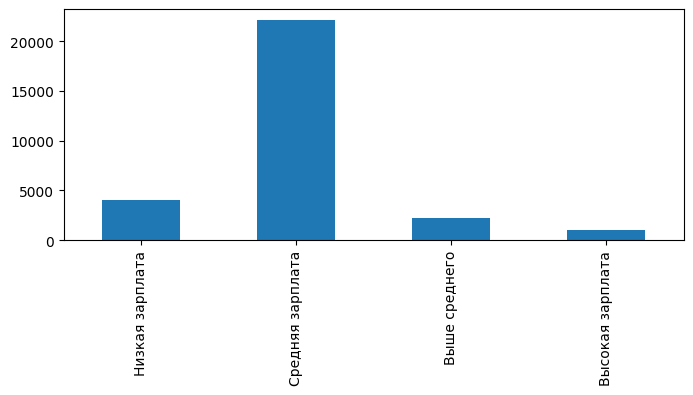

In [21]:
(pd.cut(empl['salary'],
           bins=[0, 20000, 50000, 100000, 1000000],
           labels=['Низкая зарплата', 'Средняя зарплата',
                    'Выше среднего', 'Высокая зарплата'])
    .value_counts(sort=False)
    .plot(kind='bar', figsize=(8, 3))
)

## qcut

#### Делит непрерывную величину на интервалы по квантилям (так, чтобы в каждой группе было примерно равно число наблюдений)

In [22]:
# в каждый полуинтервал попадает по 25% (100 / q = 4)
pd.qcut(empl['salary'], q=4)

0         (35400.0, 154700.0]
1        (12599.999, 22300.0]
2        (12599.999, 22300.0]
3        (12599.999, 22300.0]
4        (12599.999, 22300.0]
                 ...         
29367     (35400.0, 154700.0]
29368      (26600.0, 35400.0]
29369      (26600.0, 35400.0]
29370     (35400.0, 154700.0]
29371      (22300.0, 26600.0]
Name: salary, Length: 29372, dtype: category
Categories (4, interval[float64, right]): [(12599.999, 22300.0] < (22300.0, 26600.0] < (26600.0, 35400.0] < (35400.0, 154700.0]]

In [23]:
pd.qcut(empl['salary'], q=[0, 0.1, 0.4, 0.75, 1])

0         (35400.0, 154700.0]
1          (19300.0, 24800.0]
2        (12599.999, 19300.0]
3        (12599.999, 19300.0]
4        (12599.999, 19300.0]
                 ...         
29367     (35400.0, 154700.0]
29368      (24800.0, 35400.0]
29369      (24800.0, 35400.0]
29370     (35400.0, 154700.0]
29371      (24800.0, 35400.0]
Name: salary, Length: 29372, dtype: category
Categories (4, interval[float64, right]): [(12599.999, 19300.0] < (19300.0, 24800.0] < (24800.0, 35400.0] < (35400.0, 154700.0]]

#### При помощи данного метода можно стратифицированно делить людей на группы

In [24]:
(empl
    .query("report_dt == '2022-12-31'")
    .assign(salary_bin = lambda df: pd.qcut(df['salary'], q=5)) # делим зарплату на 5 интервалов
    .groupby(['sex', 'education', 'salary_bin']) # группируем по  полу, образованию и зарплатному интервалу
    .sample(frac=0.3, random_state=10) # берем 30% строк из каждой группы
    
)

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary,salary_bin
29000,2022-12-31,1409,Макеева Мария Денисовна,женский,6,Уборщик,628,62,0,2,1984-05-25,высшее,6,25600.0,"(20799.999, 25600.0]"
29036,2022-12-31,1859,Ларионова Татьяна Денисовна,женский,8,Кассир,85,83,0,0,1969-04-18,высшее,5,21200.0,"(20799.999, 25600.0]"
29075,2022-12-31,462,Сычева София Степановна,женский,9,Продавец-консультант,920,92,0,0,1990-10-24,высшее,6,26100.0,"(25600.0, 28500.0]"
29271,2022-12-31,1866,Дьякова Алена Антоновна,женский,19,Продавец-консультант,198,191,0,0,1982-05-30,высшее,6,26000.0,"(25600.0, 28500.0]"
29216,2022-12-31,1500,Винниченко Раиса Валерьевна,женский,17,Кассир,174,173,0,2,1992-07-09,высшее,6,28700.0,"(28500.0, 32720.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29055,2022-12-31,1725,Олейников Андрей Михайлович,мужской,8,Товаровед,824,82,0,1,1974-02-05,среднее профессиональное,5,32300.0,"(28500.0, 32720.0]"
29347,2022-12-31,1255,Костин Артем Артурович,мужской,23,Старший кассир,235,232,0,2,1971-08-14,среднее профессиональное,8,42700.0,"(32720.0, 42700.0]"
29154,2022-12-31,1413,Горелов Александр Иванович,мужской,13,Продавец-консультант,1312,132,0,2,2001-04-15,среднее профессиональное,5,38000.0,"(32720.0, 42700.0]"
29047,2022-12-31,1587,Аникин Марат Арсеньевич,мужской,8,Продавец-консультант,816,82,0,2,1988-07-04,среднее профессиональное,8,38000.0,"(32720.0, 42700.0]"


In [25]:
(empl
    .query("report_dt == '2022-12-31'")
    .groupby('sex') # группируем по полу
    .apply(lambda x: x.assign(salary_bin = 
                              # внутри каждой группы по полу делим зарплату на 5 интервалов
                              lambda df: pd.qcut(df['salary'], q=5))
                                            .groupby('salary_bin') # группируем по этим интервалам
                                            .sample(frac=0.3, random_state=10) # берем 30% строк из каждой группы
          )
    .reset_index(drop=True)
)

,report_dt,i_pernr,fio,sex,shop_id,pos_name,pos_id,closest_boss_pos_id,mgmt_flag,salary_fork,birth_date,education,employee_evaluation,salary,salary_bin
0,2022-12-31,1791,Юдина Вера Олеговна,женский,9,Кассир,94,93,0,0,1972-08-13,среднее общее,5,21100.0,"(20799.999, 25500.0]"
1,2022-12-31,65,Денисова Мария Васильевна,женский,4,Кассир,45,43,0,0,1989-06-07,высшее,6,21200.0,"(20799.999, 25500.0]"
2,2022-12-31,1861,Ткачева Маргарита Андреевна,женский,13,Кассир,135,133,0,0,1984-12-06,основное общее,4,21200.0,"(20799.999, 25500.0]"
3,2022-12-31,1782,Скворцова Тамара Тимуровна,женский,4,Кассир,46,43,0,0,1984-08-24,среднее общее,5,21100.0,"(20799.999, 25500.0]"
4,2022-12-31,1717,Копылова Вероника Руслановна,женский,5,Продавец-консультант,511,51,0,0,1967-09-15,среднее общее,4,25500.0,"(20799.999, 25500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2022-12-31,100224,Цветков Захар Сергеевич,мужской,12,Заместитель директора магазина,122,121,1,0,1981-01-22,высшее,6,111200.0,"(46000.0, 154700.0]"
142,2022-12-31,100217,Чесноков Анатолий Васильевич,мужской,4,Директор магазина,41,<NA>,1,0,1964-06-11,высшее,5,125100.0,"(46000.0, 154700.0]"
143,2022-12-31,100157,Мешков Николай Маратович,мужской,11,Директор магазина,111,<NA>,1,0,1989-04-12,высшее,9,120500.0,"(46000.0, 154700.0]"
144,2022-12-31,100200,Безруков Глеб Артёмович,мужской,18,Директор магазина,181,<NA>,1,0,1981-01-19,высшее,6,134200.0,"(46000.0, 154700.0]"


# Задания

#### Описание таблиц лежит [здесь](https://github.com/victorlymarev/pandas/tree/main/tables)

Некоторые таблицы занимают много памяти, поэтому каждые 5-10 заданий лучше перезапускайте ноутбук.

Если вы будете работать с этим ноутбуком в google colab и у вас что-то не будет работать, то раскоментируйте ячейку ниже (для этого выделите содержимое ячейки и нажмите на клавиши ctrl / (если смотреть по английской раскладке или ctrl . для русской), либо просто руками уберите # и пробел после нее в каждой строчке) и запустите ее.

In [ ]:
# import os
# os._exit(00)
# !pip install pyarrow pandas==1.5.3

### Задание 1

Разделите объем торговли на 10 равных интервалов

In [ ]:
# таблица ltc - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_ltc_sample на path_ltc_full внутри функции read_parquet

import os
import pandas as pd

# path_ltc_full = '../tables/ltc.parquet' if os.path.exists('../tables/ltc.parquet') else "https://drive.usercontent.google.com/download?id=1ZkAmVZverOV3aGwmEQGAFXgXnQ6pPsZw&export=download&authuser=1&confirm=t&uuid=b827b3e2-7c5d-4979-9d25-f1c34954ac9f&at=APZUnTUs_oUnCQujGIlgn2Zkb5VG:1693327327264"
path_ltc_sample = '../tables/ltc_sample.parquet' if os.path.exists('../tables/ltc_sample.parquet') else 'https://drive.google.com/uc?id=1XaThogOOqKjJj50LvfJ9WqutjMAC5AxA'

ltc = pd.read_parquet(path_ltc_sample)
ltc.head()

In [ ]:
# напишите свой код здесь

### Задание 2

Разделите объем торговли на 10 интервалов так, чтобы в каждом интервале лежало примерно равное число наблюдений

In [ ]:
# таблица ltc - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_ltc_sample на path_ltc_full внутри функции read_parquet

import os
import pandas as pd

# path_ltc_full = '../tables/ltc.parquet' if os.path.exists('../tables/ltc.parquet') else "https://drive.usercontent.google.com/download?id=1ZkAmVZverOV3aGwmEQGAFXgXnQ6pPsZw&export=download&authuser=1&confirm=t&uuid=b827b3e2-7c5d-4979-9d25-f1c34954ac9f&at=APZUnTUs_oUnCQujGIlgn2Zkb5VG:1693327327264"
path_ltc_sample = '../tables/ltc_sample.parquet' if os.path.exists('../tables/ltc_sample.parquet') else 'https://drive.google.com/uc?id=1XaThogOOqKjJj50LvfJ9WqutjMAC5AxA'

ltc = pd.read_parquet(path_ltc_sample)
ltc.head()

In [ ]:
# напишите свой код здесь

### Задание 3

Посчитайте симметричную KL дивергенцию между распределением зарплат 31 декабря 2021 года и распределением зарплат 31 декабря 2022 года. Для этого сначала разделите исходную таблицу на две (по датам). Затем внутри каждой таблицы разделите зарплаты на интервалы от нуля до 30 000, от 30 000 до 40 000, от 40 000 до 50 000, от 50 000 до 60 000, от 60 000 до 70 000, от 70 000 до 100 000 и от 100 000  до 200 000. После чего посчитайте долю наблюдений в каждом интервале. 

В итоге у вас должно получиться 2 массива, в которых лежат доли наблюдений в каждом интервале. Назовем их массив1 и массив2.

Посчитайте следующую величину: (массив1 - массив2) * log(массив1/массив2)
И просуммируйте значения в нем.

P.S. KL - дивергенция служит мерой похожести между двумя распределениями. 

### Задание 4

Для каждого покупателя, который был в магазине в 2022 году, посчитайте сколько раз за этот год он приходил в магазин (по числу чеков), среднюю сумму его чека, и пол (если 70 и более процентов его товаров за этот год - мужские, то это мужчина, если 70 и более процентов его товаров женские, то женщина, иначе считайте, что карточка клиента семейная. То есть в поле 3 значения). Затем при помощи функции qcut разделите количество товаров в чеке на 5 интервалов, а среднюю сумму чека на 10. Теперь на на основе трех колонок разделите покупателей на 3 равные группы. Каждый покупатель может быть только в одной группе.  

In [ ]:
# таблица sales - большая, и в некоторых случаях ваш компьютер может не справиться с ее обработкой
# поэтому лучше работайте с частью этой таблицы
# но если вы хотите попробовать поработать с полной версией таблицы,
# можете заменить переменную path_sales_2022 на path_sales внутри функции read_parquet

import os
import pandas as pd

path_sales_2022 = '../tables/sales_2022.parquet' if os.path.exists('../tables/sales_2022.parquet') else 'https://drive.google.com/uc?id=17e7FwXVdsWc2aziK9s5KidIvPcfKt9F5'
# path_sales = '../tables/sales.parquet' if os.path.exists('../tables/sales.parquet') else "https://drive.usercontent.google.com/download?id=15KwSxyM6hpNABGe6_vsrFZvD09VfHFyK&export=download&authuser=1&confirm=t&uuid=115bd48c-cc2c-4f2a-8b42-be5ca6ef6db8&at=APZUnTUVb8nfNANw5wr9Cad7PJ3U:1693327774694"

sales = pd.read_parquet(path_sales_2022)
sales.head()

In [ ]:
path_goods_descr = '../tables/goods_description.parquet' if os.path.exists('../tables/goods_description.parquet') else 'https://drive.google.com/uc?id=1YbiD02Rev-X_WWV9nPSG1zZFmEh2JjPh'

goods_descr = pd.read_parquet(path_goods_descr)
goods_descr.head()

In [ ]:
# напишите свой код здесь

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Александр\AppData\Local\Temp\ipykernel_15708\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
